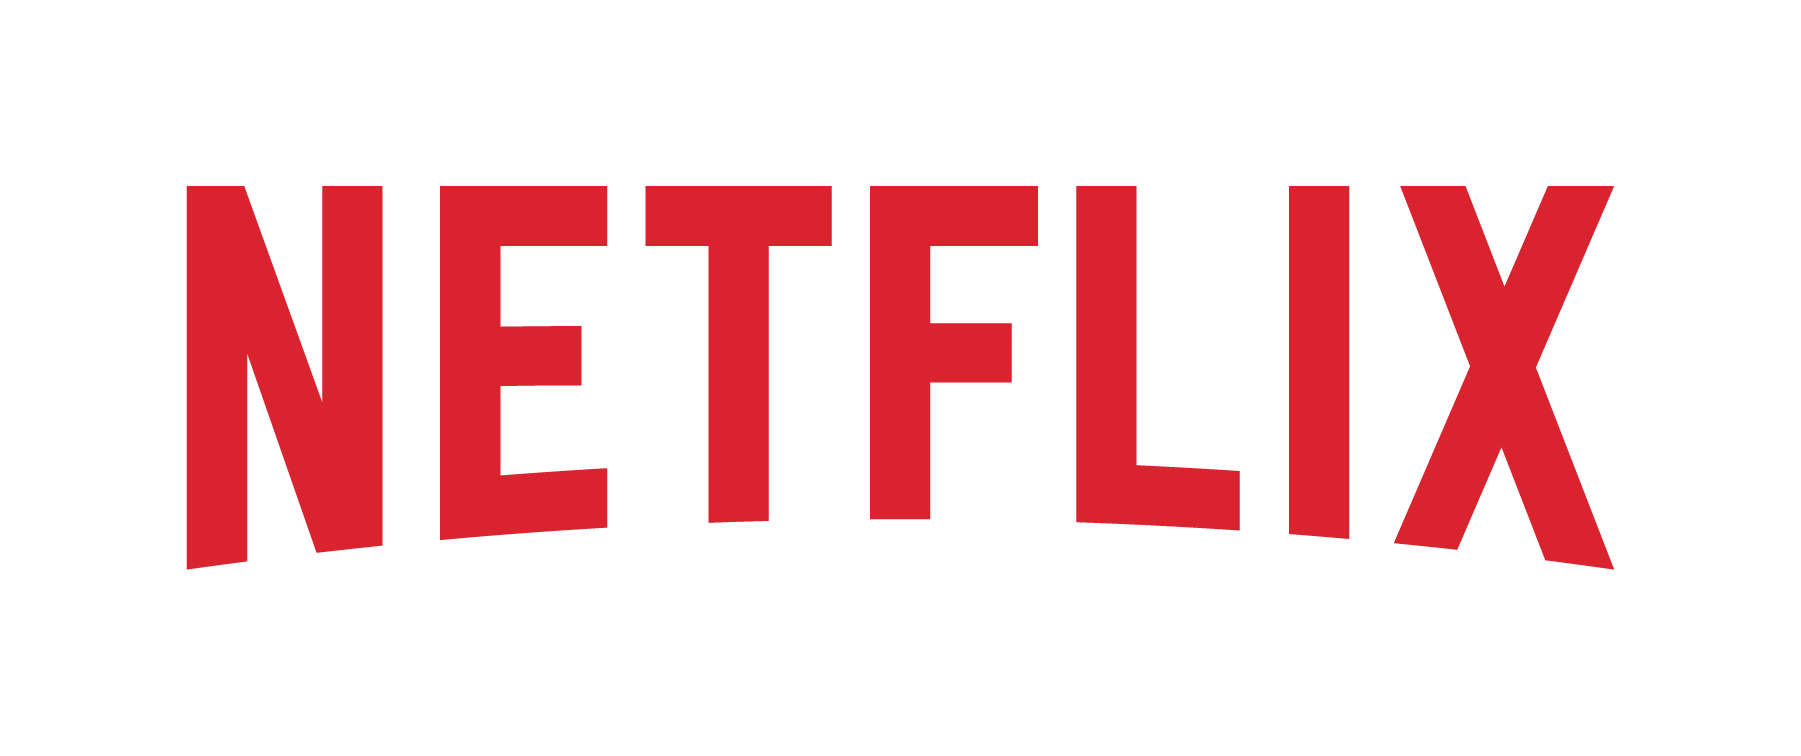

<h1><font color=#FF0000>Introduction</font></h1>


This project analyzes a Netflix dataset from Kaggle to provide valuable insights based on SQL queries. 
The analysis is split into three sub-categories: 
1) Analysis of TV Shows and Movies

2) Analysis of Directors

3) Analysis of Ratings and Duration

The dataset used for this project can be found here: https://www.kaggle.com/datasets/shivamb/netflix-shows 

In [98]:
#Step 1: Importing necessary libraries

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import sqlite3   

In [113]:
#Step 2: Reading the CSV file containing all the Netflix data

df_netflix = pd.read_csv('netflix_titles.csv')

<h2> Dataset Description </h2>


This dataset contains 6234 rows and 12 columns. These columns include data that tells the show_id, type, title, director,cast, country, date_added, release_year, rating, duration, listed_in, and description for every title. This dataset includes titles released from 1925 until 2020.

In [100]:
#Step 3: Getting more info about this dataset 

#the number of rows and columns of this dataframe
print(df_netflix.shape)
#the columns in the Netflix data frame
print(df_netflix.columns)
#additional statistical measures such as count,mean,std,etc
print(df_netflix.describe())
#preview of first 5 rows of the dataframe
df_netflix.head()


(6234, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
            show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [101]:
#Step 4: importing sqlite  

from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

# export the dataframe as a table 'playstore' to the sqlite engine
df_netflix.to_sql("netflix", con =engine)

6234

<h1><font color=#FF0000>1) Analysis of TV Shows and Movies</font></h1>

This analysis shows the number of TV Shows and Movies in this datset, as well as their average duration. The average distribution for releases over the years is also shown.


In [102]:
# Query 1: couting number of Tv shows and Movies 

sql1='''

Select count(*) AS "# of Movies" from netflix
where type = "Movie"

''';

    
df_sql1 = pd.read_sql_query(sql1,con=engine)
df_sql1


,# of Movies
0,4265


In [103]:
sql_1='''

Select count(*) AS "# of TV Shows" from netflix
where type = "TV Show"

''';

    
df_sql_1 = pd.read_sql_query(sql_1,con=engine)
df_sql_1

,# of TV Shows
0,1969


In [104]:
#Query 2: Finding average duration of TV shows and movies
sql2='''

Select avg(duration) AS "Avg Duration for TV Shows (seasons)"
from netflix
where type = "TV Show"

''';

    
df_sql2 = pd.read_sql_query(sql2,con=engine)
df_sql2

,Avg Duration for TV Shows (seasons)
0,1.779584


In [105]:
sql2_1='''

Select avg(duration) AS "Avg Duration for Movies (mins)"
from netflix
where type = "Movie"

''';

    
df_sql2_1 = pd.read_sql_query(sql2_1,con=engine)
df_sql2_1

,Avg Duration for Movies (mins)
0,99.100821


In [106]:
#Query 3: Finding distribution of TV Shows and Movie releases over the years 
sql3='''

Select count(*) AS "Count of Movies", release_year
from netflix
where type = "Movie"
group by release_year
order by release_year DESC

''';

    
df_sql3 = pd.read_sql_query(sql3,con=engine)
df_sql3



,Count of Movies,release_year
0,6,2020
1,400,2019
2,646,2018
3,682,2017
4,593,2016
...,...,...
65,2,1946
66,3,1945
67,3,1944
68,3,1943


In [107]:
sql3_1='''

Select count(*) AS "Count of TV Shows", release_year
from netflix
where type = "TV Show"
group by release_year
order by release_year

''';

    
df_sql3_1 = pd.read_sql_query(sql3_1,con=engine)
df_sql3_1

,Count of TV Shows,release_year
0,1,1925
1,1,1946
2,1,1963
3,1,1967
4,1,1968
5,1,1972
6,1,1974
7,1,1977
8,1,1979
9,1,1981


Takeaways from this analysis:

1. The ratio of movies to tv shows is 2.1:1. This means that for every tv show, there was 2.1 movies. 
2. The average duration for a tv show was 1.7 seasons while the average duration for a movie was 99 minutes.
3. For movies, starting in 1925, the number of movies was very less (under 5), until 1973 when more movies started being produced and released on Netflix. The rise in number of movies increased and hit 100 movies released in 2011. In 2017, the most movies were released: 682. Unfortunately, the pandemic in 2020 caused the number to drop significantly to 6 movies released that year. 
4. As for tv shows, the number of tv shows released remained under 5 until 2003, where 8 tv shows were released. Just like the movies, the tv shows saw a jump in titles with the biggest jump being 2014 to 2015 where the showed released went from 75 to 154. The max shows released was in 2019 with 443. Just like the movies, the tv shows were also affected and only 19 were released in 2020. 

<h1><font color=#FF0000>2) Analysis of Directors </font></h1> 

This analysis shows the directors with the highest number of titles as well as the ratings per director. 


In [108]:
#query 4 Finding directors with highest number of titles 

sql4='''

Select count(*) AS "# of titles", director
from netflix
group by director
order by "# of titles" DESC


''';

    
df_sql4 = pd.read_sql_query(sql4,con=engine)
df_sql4.head(25)

,# of titles,director
0,1969,None
1,18,"Raúl Campos, Jan Suter"
2,14,Marcus Raboy
3,13,Jay Karas
4,12,Jay Chapman
5,9,Steven Spielberg
6,9,Martin Scorsese
7,8,Lance Bangs
8,8,Johnnie To
9,8,David Dhawan


In [109]:
#query 5 Finding ratings for titles directed by each director 

sql5='''

Select director, rating, count(*) AS rating_count
from netflix
group by director, rating
order by rating_count DESC


''';

    
df_sql5 = pd.read_sql_query(sql5,con=engine)
df_sql5.head(30)

,director,rating,rating_count
0,None,TV-MA,675
1,None,TV-14,637
2,None,TV-PG,266
3,None,TV-Y,112
4,None,TV-Y7,101
5,None,TV-Y7-FV,77
6,None,TV-G,74
7,None,NR,17
8,"Raúl Campos, Jan Suter",TV-MA,17
9,Jay Chapman,TV-MA,10


Takeaways from this analysis:

1. Because there are several titles(1969 to be exact) that didn't have a director named, this could unfortunately make this analysis a bit inaccurate due to lack of full information.
2. Raúl Campos and Jan Suter together had produced the most titles in this dataset, 18 to be exact. There were several directors that had only 1 piece that they directed. 
3. From those 18 titles that Raúl Campos and Jan Suter had directed, 17 of them were TV-MA. 
4. We see a pattern that the TV-MA rating was quite popular as several of the directors such as Jay Chapman,Marcus Raboy, and Jay Karas had produced multiple titles that fit this rating. 



<h1><font color=#FF0000>3) Analysis of Ratings and Duration</font></h1>


This analysis shows the distribution of ratings as well as the average duration for each rating category. 


In [110]:
#query 6 Finding distribution of ratings


sql6='''

Select rating, count(show_id) AS "# of TV Shows/Movies"
from netflix
group by rating
order by "# of TV Shows/Movies" DESC

''';

    
df_sql6 = pd.read_sql_query(sql6,con=engine)
df_sql6

,rating,# of TV Shows/Movies
0,TV-MA,2027
1,TV-14,1698
2,TV-PG,701
3,R,508
4,PG-13,286
5,NR,218
6,PG,184
7,TV-Y7,169
8,TV-G,149
9,TV-Y,143


In [111]:
#query 7 Finding average duration for each rating category by movies and tv shows 

sql7='''

Select rating, avg(duration) AS "Avg duration of Movie(mins)"
from netflix
where type = "Movie"
group by rating
order by "Avg duration of Movie(mins)" DESC


''';

    
df_sql7 = pd.read_sql_query(sql7,con=engine)
df_sql7

,rating,Avg duration of Movie(mins)
0,NC-17,131.500000
1,UR,110.000000
2,PG-13,108.853147
3,TV-14,108.137765
4,R,106.158103
5,TV-PG,97.949074
6,PG,97.786885
7,TV-MA,95.295252
8,NR,95.123762
9,G,85.361111


In [112]:
sql7_1='''

Select rating, avg(duration) AS "Avg duration of TV Show(season)"
from netflix
where type = "TV Show"
group by rating
order by "Avg duration of TV Show(season)" DESC


''';

    
df_sql7_1 = pd.read_sql_query(sql7_1,con=engine)
df_sql7_1

,rating,Avg duration of TV Show(season)
0,NR,2.875000
1,TV-G,2.043478
2,TV-Y7-FV,2.000000
3,PG,2.000000
4,TV-Y7,1.920000
5,TV-Y,1.882353
6,TV-14,1.830303
7,TV-PG,1.784387
8,TV-MA,1.622975
9,R,1.000000


Takeaways from this analysis:

1. The most popular rating was TV-MA suggesting that Netflix had prioritized creating more titles catered towards the adult audience.
2. For movies, the longest movies ended up being those that were rated NC-17 at 131 minutes with PG-13 being relatively high as well at 108 minutes.
3. For tv shows, the longest shows were 2 seasons. 

<h2> Next Steps </h2>


Following this 3-part analysis, a further look at the most updated data of Netflix can look at how the pandamic had affected Netflix, looking at data in 2020 and afterwards. One could also anlyze how the subcrsciption rates may have changed in 2020. Perhaps, Netflix could have gotten new customers because everyone was stuck at home or they could have lost customers because Netflix was limited to releasing new titles due to the pandemic.